In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import csv
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/math482-2024-2025-1-hw-02-v2/sample_submission.csv
/kaggle/input/math482-2024-2025-1-hw-02-v2/train.csv
/kaggle/input/math482-2024-2025-1-hw-02-v2/test.csv


In [70]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
traindf=pd.read_csv("/kaggle/input/math482-2024-2025-1-hw-02-v2/train.csv")
testdf=pd.read_csv("/kaggle/input/math482-2024-2025-1-hw-02-v2/test.csv")
traindf.isnull().sum() 
traindf.dropna(inplace=True) #Handling NaN values
trainY=traindf["target"]
traindf.drop(["id"], axis=1, inplace=True)

In [71]:
traindf.describe()

,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,target
count,33625.000000,33625.000000,33625.000000,3.362500e+04,33625.000000,33625.000000,33625.000000,33625.000000,33625.000000,33625.000000,...,33625.000000,33625.000000,33625.000000,33625.000000,33625.000000,33625.000000,33625.000000,33625.000000,33625.000000,33625.000000
mean,-0.179270,-22.085898,15.424995,-3.386341e+04,-60.146961,-14.227214,-11.633789,39.159105,44.468933,-0.002755,...,9963.289257,36.643191,-0.005026,32.744974,-36.007494,21.106383,-0.375497,50.877943,36.723728,0.805175
std,174.129386,117.029697,104.476512,8.233785e+04,247.695925,180.981206,80.671722,197.068233,158.186883,1.055331,...,26382.582518,447.152435,1.113741,147.746936,119.177505,263.112175,85.417770,142.641369,131.089087,0.981883
min,-1892.149236,-593.124001,-820.900557,-2.367567e+06,-1431.444317,-1260.757082,-495.596550,-1459.675226,-1109.689876,-7.390405,...,-131299.064421,-3198.867376,-9.022858,-887.657761,-854.792562,-2016.214499,-515.257464,-940.327946,-1081.005976,0.000000
25%,-111.786216,-99.785850,-49.013778,-5.202250e+04,-220.922341,-128.750606,-61.993704,-75.812379,-53.888871,-0.688935,...,-2400.675742,-241.581672,-0.696030,-62.073241,-110.297928,-141.496534,-53.693739,-36.843312,-46.292690,0.000000
50%,-2.145180,-23.326237,15.614790,-1.040910e+04,-66.928769,-14.758735,-11.367308,38.483974,44.482116,-0.008348,...,2856.138661,26.911920,-0.006359,31.793794,-34.425892,24.233595,2.028376,49.362768,38.084308,1.000000
75%,109.219789,53.292737,78.342667,3.874969e+03,90.457148,100.499986,39.343376,151.403050,142.926976,0.682043,...,16646.108916,308.543308,0.690880,125.531320,40.455848,185.902113,55.335528,135.523008,121.057150,1.000000
max,1321.113069,614.567548,1154.855024,5.361401e+05,1648.185909,1314.397401,477.659021,1955.265398,1149.930096,5.584656,...,464958.131130,2730.790966,7.937621,995.846701,670.020303,1980.296276,485.581301,1315.791178,902.772360,3.000000


In [ ]:
columns=traindf.columns
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
trainvardf=min_max_scaler.fit_transform(traindf)
#Scaling data to check and compare variances of features

In [ ]:
 #Searching for features that have low variance which could be redundant
pd.DataFrame(trainvardf, columns=columns).var()

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled=scaler.fit_transform(traindf)
scaledTest=scaler.fit_transform(np.array(testdf)) #Normalizing Data
traindf=pd.DataFrame(scaled, columns=traindf.columns)
testdf=pd.DataFrame(scaledTest, columns=testdf.columns)

In [73]:
corr=traindf.corr() #we are looking for features which have low correlation with target(having low correlation with target might imply that it is redundant )
var=corr["target"]
traindf.drop(["target"], axis=1, inplace=True)
print(var)

feature_01   -0.000652
feature_02    0.159122
feature_03   -0.226840
feature_04    0.097914
feature_05    0.174503
feature_06    0.018071
feature_07    0.181415
feature_08   -0.012696
feature_09   -0.180065
feature_10    0.000370
feature_11   -0.134503
feature_12   -0.006251
feature_13   -0.219101
feature_14   -0.263671
feature_15    0.065726
feature_16    0.045542
feature_17    0.049511
feature_18   -0.000161
feature_19    0.057820
feature_20   -0.027472
feature_21    0.009727
feature_22   -0.079623
feature_23    0.091511
feature_24    0.109034
feature_25    0.002242
feature_26   -0.044517
feature_27   -0.193880
target        1.000000
Name: target, dtype: float64


In [74]:
traindf.drop(["feature_01","feature_10","feature_25","feature_18"], axis=1, inplace=True)

<Axes: >

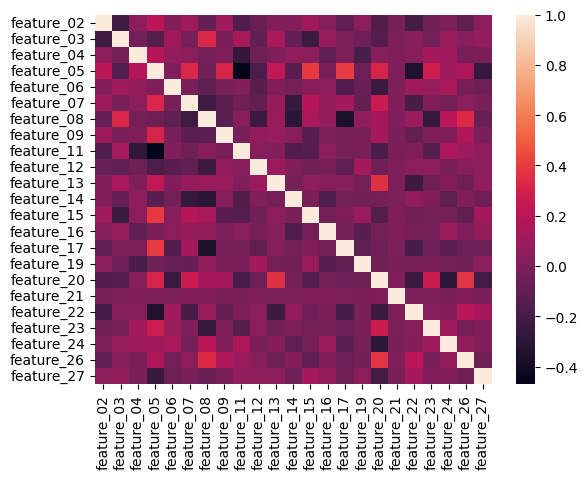

In [75]:
import seaborn as sns
corr=traindf.corr() #checking for correlation between features (high correlation between 2 variables indicates one of them could be dropped)
sns.heatmap(corr)

In [76]:
table=traindf.corr() #findout which features correlates with each other and drop the ones that correlates least with target
cache=[]
for j in traindf.columns:
    for i in traindf.columns:
        if(abs(table[i][j])>=0.4 and not(i in j)):
            if(not (([i,j] or [j,i]) in cache)):
                cache.append([i,j])
print(cache)

[['feature_11', 'feature_05'], ['feature_05', 'feature_11']]


In [77]:
traindf.drop(["feature_11"], axis=1, inplace=True)

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(traindf,trainY,test_size=0.3) #splitting dataset for validation

In [79]:
import xgboost #fitting model
model_xgboost = xgboost.XGBClassifier(learning_rate=0.01,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='mlogloss',
                                      verbosity=1)

eval_set = [(X_test, y_test)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-mlogloss:1.37960
[1]	validation_0-mlogloss:1.37376
[2]	validation_0-mlogloss:1.36742
[3]	validation_0-mlogloss:1.36220
[4]	validation_0-mlogloss:1.35616
[5]	validation_0-mlogloss:1.34970


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-mlogloss:1.34397
[7]	validation_0-mlogloss:1.33767
[8]	validation_0-mlogloss:1.33149
[9]	validation_0-mlogloss:1.32617
[10]	validation_0-mlogloss:1.32069
[11]	validation_0-mlogloss:1.31527
[12]	validation_0-mlogloss:1.30955
[13]	validation_0-mlogloss:1.30407
[14]	validation_0-mlogloss:1.29845
[15]	validation_0-mlogloss:1.29323
[16]	validation_0-mlogloss:1.28808
[17]	validation_0-mlogloss:1.28276
[18]	validation_0-mlogloss:1.27759
[19]	validation_0-mlogloss:1.27229
[20]	validation_0-mlogloss:1.26709
[21]	validation_0-mlogloss:1.26247
[22]	validation_0-mlogloss:1.25743
[23]	validation_0-mlogloss:1.25253
[24]	validation_0-mlogloss:1.24789
[25]	validation_0-mlogloss:1.24340
[26]	validation_0-mlogloss:1.23854
[27]	validation_0-mlogloss:1.23384
[28]	validation_0-mlogloss:1.22910
[29]	validation_0-mlogloss:1.22455
[30]	validation_0-mlogloss:1.21981
[31]	validation_0-mlogloss:1.21528
[32]	validation_0-mlogloss:1.21073
[33]	validation_0-mlogloss:1.20624
[34]	validation_0-mloglo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5000,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

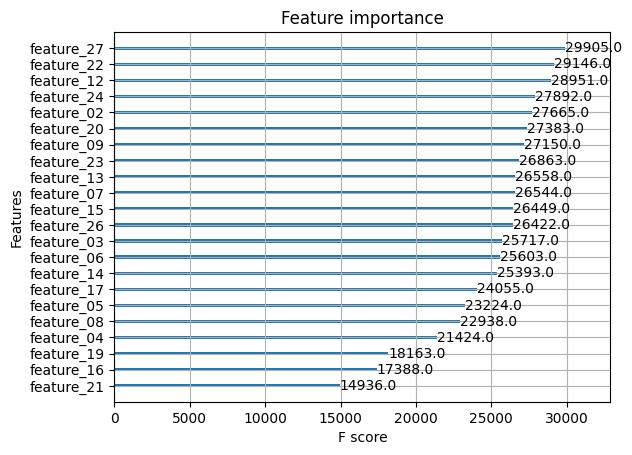

In [80]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model_xgboost)
plt.show()

In [50]:
y_pred = model_xgboost.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9072164948453608


In [136]:
testdf.drop(["id","feature_01","feature_10","feature_25","feature_18","feature_11"], axis=1,inplace=True)

ValueError: Shape of passed values is (15000, 24), indices imply (15000, 22)

In [88]:
#Write results to csv
arr=[]
y_submission=model_xgboost.predict(testdf).flatten()
for i in range(len(y_submission)):
    arr.append([i+1,y_submission[i]])
writer = csv.writer(open("/kaggle/working/submission.csv", 'w'))
for row in arr:
    writer.writerow(row)

In [ ]:
#improving model performance

In [139]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
traindf=pd.read_csv("/kaggle/input/math482-2024-2025-1-hw-02-v2/train.csv")
testdf=pd.read_csv("/kaggle/input/math482-2024-2025-1-hw-02-v2/test.csv")
traindf.isnull().sum() 
traindf.dropna(inplace=True) #Handling NaN values
trainY=traindf["target"]
traindf.drop(["id","target"], axis=1, inplace=True)
testdf.drop(["id"], axis=1, inplace=True)

In [141]:
X_train,X_test,y_train,y_test = train_test_split(traindf,trainY,test_size=0.3)

In [142]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
testScaled=scaler.transform(testdf)

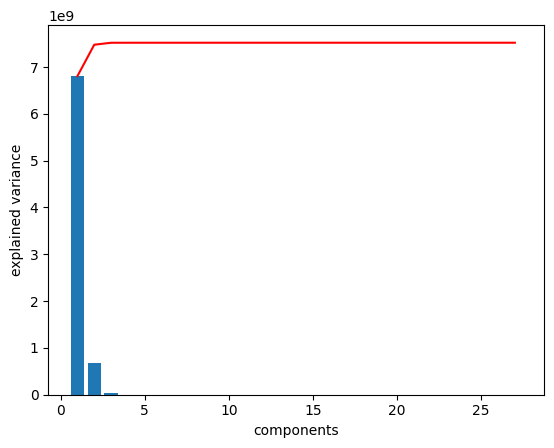

In [143]:
from sklearn.decomposition import PCA #Perform PCA to reduce dimensionality
pca1=PCA()
xpac1=pca1.fit_transform(np.array(traindf))
plt.bar(range(1,len(pca1.explained_variance_)+1),pca1.explained_variance_)
plt.ylabel("explained variance")
plt.xlabel("components")
plt.plot(range(1,len(pca1.explained_variance_)+1), np.cumsum(pca1.explained_variance_),c="red")

In [144]:
pca = PCA(0.99) #setup parameters such that PCA catches components that contribute to %95 of variance 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
testx_pca=pca.transform(testScaled)

eval_set = [(X_train_pca, y_train), (X_test_pca, y_test)]
model_xgboost = xgboost.XGBClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=5000,
    eval_metric='mlogloss',
    verbosity=1
)

model_xgboost.fit(
    X_train_pca,
    y_train,
    eval_set=eval_set,
    early_stopping_rounds=10,
    verbose=True
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.37807	validation_1-mlogloss:1.37832
[1]	validation_0-mlogloss:1.36998	validation_1-mlogloss:1.37049
[2]	validation_0-mlogloss:1.36208	validation_1-mlogloss:1.36286
[3]	validation_0-mlogloss:1.35426	validation_1-mlogloss:1.35529
[4]	validation_0-mlogloss:1.34662	validation_1-mlogloss:1.34790
[5]	validation_0-mlogloss:1.33909	validation_1-mlogloss:1.34064
[6]	validation_0-mlogloss:1.33175	validation_1-mlogloss:1.33357
[7]	validation_0-mlogloss:1.32445	validation_1-mlogloss:1.32655
[8]	validation_0-mlogloss:1.31735	validation_1-mlogloss:1.31976
[9]	validation_0-mlogloss:1.31023	validation_1-mlogloss:1.31287
[10]	validation_0-mlogloss:1.30327	validation_1-mlogloss:1.30620
[11]	validation_0-mlogloss:1.29638	validation_1-mlogloss:1.29959
[12]	validation_0-mlogloss:1.28966	validation_1-mlogloss:1.29316
[13]	validation_0-mlogloss:1.28293	validation_1-mlogloss:1.28671
[14]	validation_0-mlogloss:1.27635	validation_1-mlogloss:1.28040
[15]	validation_0-mlogloss:1.26982	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5000,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [145]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model_xgboost.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9217
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4952
           1       0.92      0.93      0.92      3068
           2       0.92      0.84      0.88      1053
           3       0.90      0.75      0.82      1015

    accuracy                           0.92     10088
   macro avg       0.92      0.87      0.89     10088
weighted avg       0.92      0.92      0.92     10088



In [147]:
from sklearn.preprocessing import StandardScaler
testdf_scaled = scaler.transform(testdf)  
testdf_pca = pca.transform(testdf_scaled)

In [150]:
arr=[]
y_submission=model_xgboost.predict(testdf_pca).flatten()
for i in range(len(y_submission)):
    arr.append([i+1,y_submission[i]])
writer = csv.writer(open("/kaggle/working/submission.csv", 'w'))
for row in arr:
    writer.writerow(row)

In [ ]:
#hyperparameter optimization using Bayesian optimizitaion(we are using bayesian optimiziation instead of gridsearch because xgboost is already computationaly expensive)

In [156]:
from skopt import BayesSearchCV
from xgboost import XGBClassifier
param_space = { #hyperparemeters we will be searching
    'learning_rate': (0.01, 0.2, 'log-uniform'),
    'max_depth': (3, 10),                        
    'n_estimators': (100, 1000),                 
    'colsample_bytree': (0.6, 1.0),              
    'subsample': (0.6, 1.0),                    
    'gamma': (0.0, 0.5),                         
    'min_child_weight': (1, 10)                  
}

xgb_model = XGBClassifier(
    random_state=42, 
    use_label_encoder=False,
    eval_metric='mlogloss'
)

bayes_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

bayes_search.fit(X_train_pca, y_train)

# Best parameters and model
print("Best Hyperparameters:", bayes_search.best_params_)
best_xgb_model = bayes_search.best_estimator_

y_pred = best_xgb_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [157]:
X_train.shape

(23537, 27)

In [159]:
arr=[]
y_submission=best_xgb_model.predict(testdf_pca).flatten()
for i in range(len(y_submission)):
    arr.append([i+1,y_submission[i]])
writer = csv.writer(open("/kaggle/working/submission.csv", 'w'))
for row in arr:
    writer.writerow(row)